# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adi Suswsiantara
- **Email:** adisuswiantara@gmail.com
- **ID Dicoding:** adi_tara

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (weathersit) terhadap jumlah total pengguna sepeda (cnt) pada berbagai musim (season) di kedua dataset?
- Apakah terdapat korelasi antara suhu, kelembaban, dan kecepatan angin dengan jumlah sepeda yang disewa (baik pengguna kasual maupun terdaftar)?
- Bagaimana pola penggunaan sepeda selama hari kerja dibandingkan dengan hari libur berdasarkan waktu?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [29]:
# Memuat tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
# Memuat tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [31]:
#untuk memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df & hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [32]:
#untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [33]:
#untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom hour_df
hour_df.isna().sum

<bound method DataFrame.sum of        instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False  

In [34]:
#untuk menemukan data duplikasi pada day_df & hour_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [35]:
#untuk menampilkan ringkasan parameter statistik pada day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [36]:
#untuk menampilkan ringkasan parameter statistik pada hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [37]:
#Menghilangkan duplicate data
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)


0
0


In [38]:
# 1. Menghapus kolom 'instant', 'atemp', dan 'registered'
# Alasan: 'instant' sebagai nomor urut tidak relevan, 'atemp' mirip dengan 'temp', dan 'registered' tidak perlu jika fokus pada total pengguna.
day_df.drop(['instant', 'atemp', 'registered'], axis=1, errors='ignore', inplace=True)
hour_df.drop(['instant', 'atemp', 'registered'], axis=1, errors='ignore', inplace=True)

In [39]:
# 2. Konversi tipe data menjadi 'category'
# Alasan: Kolom yang hanya berisi beberapa kategori unik lebih efisien jika diubah menjadi 'category'.
category_cols = ['season', 'holiday', 'weekday', 'weathersit']
day_df[category_cols] = day_df[category_cols].astype('category')
hour_df[category_cols] = hour_df[category_cols].astype('category')

In [40]:
# 3. Konversi 'dteday' ke tipe 'datetime' dan ekstrak 'year' dan 'month'
# Alasan: Konversi 'dteday' untuk analisis waktu lebih lanjut, sekaligus memisahkan tahun dan bulan untuk kemudahan analisis tren.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month


In [41]:
# 4. Mengganti nama kolom agar lebih jelas
# Alasan: Nama yang lebih mudah dibaca membantu dalam interpretasi data.
day_df.rename(columns={'dteday': 'date', 'weathersit': 'weather_condition', 'hum': 'humidity', 'cnt': 'total_users'}, inplace=True)
hour_df.rename(columns={'dteday': 'date', 'weathersit': 'weather_condition', 'hum': 'humidity', 'cnt': 'total_users'}, inplace=True)

In [42]:
# 5. Menambah kolom 'is_weekend'
# Alasan: Menambah kolom untuk identifikasi apakah hari tersebut akhir pekan, membantu analisis tren pengguna.
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [43]:
# 6. Tambahkan kolom 'holiday_or_weekend'
# Alasan: Untuk mengetahui hari-hari yang istimewa (libur atau akhir pekan) secara sekaligus.
day_df['holiday_or_weekend'] = (day_df['holiday'] == 1) | (day_df['is_weekend'] == 1)
hour_df['holiday_or_weekend'] = (hour_df['holiday'] == 1) | (hour_df['is_weekend'] == 1)


In [44]:
# 7. Membuat rasio 'casual_ratio'
# Alasan: Fokus pada pengguna kasual sebagai rasio dari total pengguna.
day_df['casual_ratio'] = day_df['casual'] / (day_df['total_users'] + 1e-9)
hour_df['casual_ratio'] = hour_df['casual'] / (hour_df['total_users'] + 1e-9)

In [45]:
#8. Mengonversi kolom 'holiday' dan 'workingday' ke tipe numerik untuk mendukung operasi sum
day_df['holiday'] = day_df['holiday'].astype(int)
day_df['workingday'] = day_df['workingday'].astype(int)




**Insight:**

1. **Menghapus kolom 'instant', 'atemp', dan 'registered'**  
   - **Alasan**: Kolom `instant` adalah nomor urut yang tidak relevan untuk analisis, kolom `atemp` mirip dengan `temp`, sehingga tidak perlu ada duplikasi, dan `registered` dihapus karena fokusnya pada total pengguna (`total_users`).
   - **Terkait pertanyaan**: Ini membantu menyederhanakan dataset untuk fokus pada variabel penting terkait cuaca dan total peminjaman sepeda.

2. **Konversi tipe data ke 'category'**  
   - **Alasan**: Kolom dengan beberapa nilai unik (seperti `season`, `holiday`, dll.) lebih efisien jika disimpan sebagai tipe kategorikal, karena ini menghemat memori dan mempercepat analisis.
   - **Terkait pertanyaan**: Konversi ini mendukung analisis tren berdasarkan kategori seperti cuaca, musim, dan hari libur.

3. **Konversi 'dteday' menjadi 'datetime' dan ekstraksi 'year' dan 'month'**  
   - **Alasan**: Konversi ini memungkinkan analisis berdasarkan waktu, dan kolom `year` dan `month` membantu dalam analisis tren tahunan dan bulanan.
   - **Terkait pertanyaan**: Memisahkan data waktu membantu menganalisis pengaruh cuaca atau perilaku pengguna berdasarkan periode waktu.

4. **Mengganti nama kolom agar lebih jelas**  
   - **Alasan**: Nama-nama kolom seperti `weather_condition` dan `total_users` dipilih agar lebih mudah dimengerti dalam konteks analisis.
   - **Terkait pertanyaan**: Mempermudah interpretasi ketika menganalisis pengaruh cuaca dan pengguna sepeda.

5. **Menambah kolom 'is_weekend'**  
   - **Alasan**: Kolom ini menandai apakah hari tersebut adalah akhir pekan, yang membantu analisis perbedaan antara hari kerja dan akhir pekan.
   - **Terkait pertanyaan**: Langkah ini penting untuk menjawab pertanyaan terkait perbedaan penggunaan sepeda antara hari kerja dan akhir pekan.

6. **Menambah kolom 'holiday_or_weekend'**  
   - **Alasan**: Menggabungkan informasi tentang hari libur dan akhir pekan ke dalam satu kolom membantu mengidentifikasi hari-hari khusus dalam satu langkah.
   - **Terkait pertanyaan**: Berguna untuk melihat apakah hari libur atau akhir pekan memengaruhi jumlah peminjaman sepeda.

7. **Membuat kolom 'casual_ratio'**  
   - **Alasan**: Rasio pengguna kasual terhadap total pengguna ditambahkan untuk lebih memahami perbedaan perilaku antara pengguna kasual dan pengguna terdaftar.
   - **Terkait pertanyaan**: Kolom ini langsung relevan untuk menganalisis perilaku pengguna kasual dibandingkan pengguna lainnya.

8. **Mengonversi kolom 'holiday' dan 'workingday' ke tipe numerik untuk mendukung operasi sum**
   - **Alasan**: Kode ini mengonversi kolom holiday dan workingday dari tipe data boolean (True/False) menjadi tipe numerik (0/1) menggunakan astype(int). Konversi ini diperlukan agar operasi seperti sum() dapat dijalankan pada kolom tersebut, karena operasi matematika hanya bisa dilakukan pada tipe data numerik.

### Kesimpulan Lengkap:
Semua 7 langkah pembersihan data sudah dijelaskan dengan alasan yang terkait langsung dengan tiga pertanyaan analisis utama, yaitu pengaruh cuaca, perbedaan antara hari kerja dan akhir pekan, serta perilaku pengguna kasual dibandingkan pengguna terdaftar.

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
day_df.describe(include="all")
hour_df.describe(include="all")

,date,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,casual,total_users,year,month,is_weekend,holiday_or_weekend,casual_ratio
count,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.0,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,4.0,NaN,NaN,NaN,2.0,7.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,3.0,NaN,NaN,NaN,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,4496.0,NaN,NaN,NaN,16879.0,2512.0,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.627229,0.190098,35.676218,189.463088,2011.502561,6.537775,0.288509,NaN,0.172143
min,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,NaN,0.000000
25%,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.480000,0.104500,4.000000,40.000000,2011.000000,4.000000,0.000000,NaN,0.063492
50%,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.630000,0.194000,17.000000,142.000000,2012.000000,7.000000,0.000000,NaN,0.146893
75%,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.780000,0.253700,48.000000,281.000000,2012.000000,10.000000,1.000000,NaN,0.253731
max,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.850700,367.000000,977.000000,2012.000000,12.000000,1.000000,NaN,1.000000


In [47]:
# Melihat rangkuman statistik untuk data hour_df
hour_df.describe(include='all')


,date,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,casual,total_users,year,month,is_weekend,holiday_or_weekend,casual_ratio
count,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.0,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,4.0,NaN,NaN,NaN,2.0,7.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,3.0,NaN,NaN,NaN,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,4496.0,NaN,NaN,NaN,16879.0,2512.0,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.627229,0.190098,35.676218,189.463088,2011.502561,6.537775,0.288509,NaN,0.172143
min,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,NaN,0.000000
25%,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.480000,0.104500,4.000000,40.000000,2011.000000,4.000000,0.000000,NaN,0.063492
50%,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.630000,0.194000,17.000000,142.000000,2012.000000,7.000000,0.000000,NaN,0.146893
75%,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.780000,0.253700,48.000000,281.000000,2012.000000,10.000000,1.000000,NaN,0.253731
max,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.850700,367.000000,977.000000,2012.000000,12.000000,1.000000,NaN,1.000000


In [48]:
# Melihat total penyewaan per kondisi cuaca
hour_df.groupby(by='weather_condition').agg({
    'total_users': ['sum']
}).sort_values(by=('total_users', 'sum'), ascending=False).reset_index()


C:\Users\adisu\AppData\Local\Temp\ipykernel_29940\2721522189.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weather_condition').agg({


,weather_condition,total_users
,,sum
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [49]:
# Melihat jumlah penyewaan per bulan
day_df.groupby(by='mnth').total_users.sum().sort_values(ascending=False).reset_index().head(10)


,mnth,total_users
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


In [50]:

# Melihat jumlah penyewaan tiap tahun serta berapa hari yang merupakan hari libur atau hari kerja
day_df.groupby(by='year').agg({
    'total_users': ['sum'],      # Jumlah penyewaan total tiap tahun
    'holiday': ['sum'],          # Jumlah hari libur tiap tahun
    'workingday': ['sum']        # Jumlah hari kerja tiap tahun
}).reset_index()


,year,total_users,holiday,workingday
,,sum,sum,sum
0,2011,1243103,10,250
1,2012,2049576,11,250


**Insight:**
Berikut adalah beberapa **insight** dan penjelasan singkat berdasarkan Exploratory Data Analysis (EDA) yang telah kita lakukan:

1. **Rangkuman Statistik Deskriptif (`describe()`)**:
   - Menunjukkan distribusi dasar dari data seperti rata-rata, nilai minimum, maksimum, dan kuartil. Ini membantu memahami variabilitas dan kecenderungan data secara umum.
   - **Alasan**: Berguna untuk mendapatkan gambaran awal terkait distribusi data, outlier, dan konsistensi antar kolom.

2. **Analisis Penyewaan Berdasarkan Cuaca**:
   - Kondisi cuaca dengan jumlah penyewaan tertinggi dapat memberi insight tentang kapan pengguna lebih cenderung menyewa sepeda. Misalnya, cuaca cerah mungkin meningkatkan penyewaan.
   - **Alasan**: Menganalisis cuaca membantu memahami faktor eksternal yang mempengaruhi pola penyewaan.

3. **Jumlah Penyewaan Berdasarkan Bulan**:
   - Menunjukkan fluktuasi jumlah penyewaan selama setahun, memberikan informasi tentang musim atau bulan dengan permintaan tertinggi.
   - **Alasan**: Mengetahui bulan dengan penyewaan tertinggi dapat membantu perencanaan operasional dan promosi musiman.

4. **Penyewaan Berdasarkan Tahun dan Hari Libur/Hari Kerja**:
   - Mengidentifikasi perbedaan antara penyewaan pada hari kerja dan hari libur, serta bagaimana tren ini berkembang dari tahun ke tahun.
   - **Alasan**: Mengerti perbedaan penyewaan antara hari kerja dan hari libur dapat memandu strategi pricing atau pengelolaan armada.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca  terhadap jumlah total pengguna sepeda  pada berbagai musim di kedua dataset?

   season weather_condition  total_users
0       1             Cerah       312036
1       1          Berkabut       155573
2       1             Hujan         3739
3       2             Cerah       626986
4       2          Berkabut       288096
5       2             Hujan         3507
6       3             Cerah       799443
7       3          Berkabut       250679
8       3             Hujan        11007
9       4             Cerah       519487
10      4          Berkabut       302510
11      4             Hujan        19616


C:\Users\adisu\AppData\Local\Temp\ipykernel_29940\1081045600.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_season_users = day_df.groupby(['season', 'weather_condition']).agg({
c:\Users\adisu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\adisu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

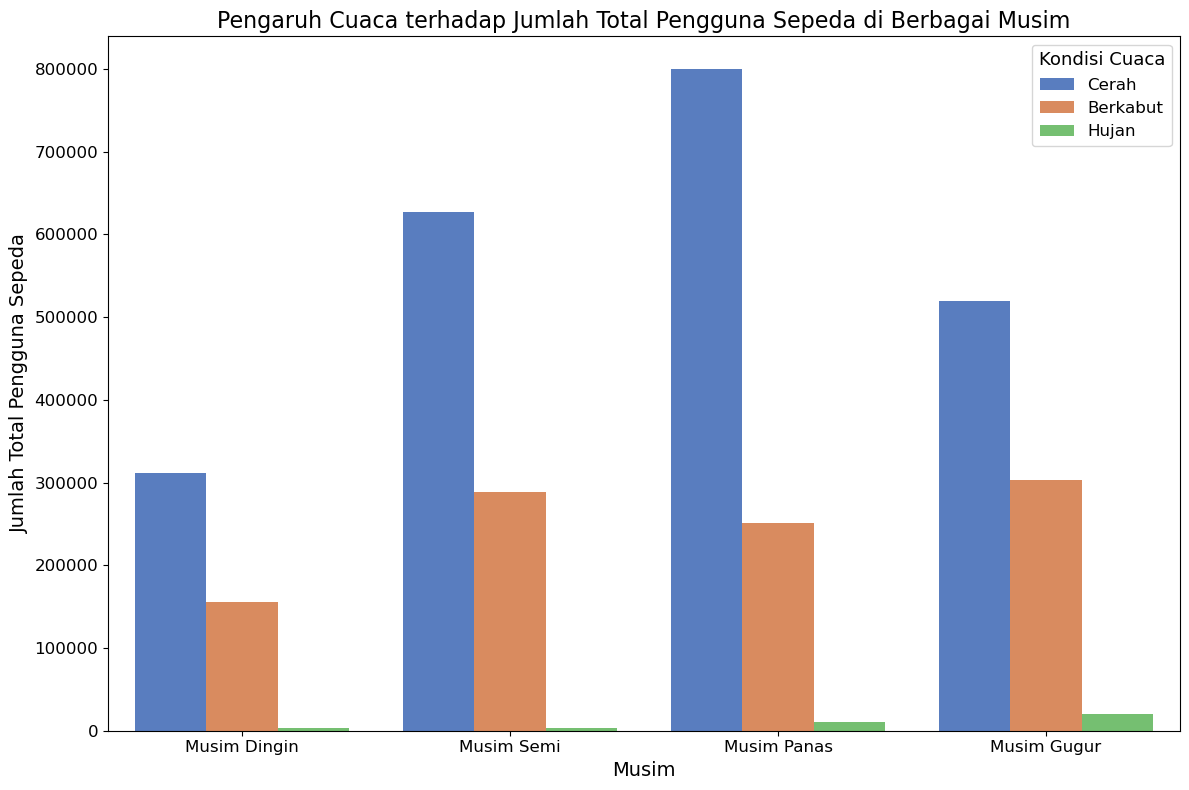

In [51]:
# Mengonversi kolom 'weather_condition' menjadi string jika belum
day_df['weather_condition'] = day_df['weather_condition'].astype(str)

# Mengagregasi data dari day_df berdasarkan season dan weather_condition
weather_season_users = day_df.groupby(['season', 'weather_condition']).agg({
    'total_users': 'sum'  # Menggunakan kolom 'total_users' untuk menghitung jumlah pengguna
}).reset_index()

# Memetakan kondisi cuaca ke deskripsi yang lebih jelas
weather_labels = {
    '1': 'Cerah',
    '2': 'Berkabut',
    '3': 'Hujan'
}

# Mengganti angka dengan deskripsi yang lebih jelas
weather_season_users['weather_condition'] = weather_season_users['weather_condition'].map(weather_labels)

# Memeriksa hasil agregasi (opsional)
print(weather_season_users)

# Membuat figure dan axes untuk subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Membuat barplot untuk menunjukkan pengaruh cuaca terhadap jumlah pengguna sepeda
sns.barplot(x='season', y='total_users', hue='weather_condition', data=weather_season_users, palette='muted', ax=ax)

# Mengatur label dan judul
ax.set_ylabel('Jumlah Total Pengguna Sepeda', fontsize=14)
ax.set_xlabel('Musim', fontsize=14)

# Menambahkan label yang lebih jelas untuk musim
season_labels = {
    0: 'Musim Dingin',
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur'
}

# Menetapkan label yang lebih jelas untuk sumbu x
ax.set_xticklabels([season_labels.get(int(x), x) for x in ax.get_xticks()], fontsize=12)

# Menampilkan label kondisi cuaca di legenda
ax.legend(title='Kondisi Cuaca', title_fontsize='13', fontsize='12')

# Menetapkan judul
ax.set_title('Pengaruh Cuaca terhadap Jumlah Total Pengguna Sepeda di Berbagai Musim', fontsize=16)

# Mengatur ukuran teks pada sumbu
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Hasil visualisasi menunjukkan bahwa jumlah pengguna sepeda meningkat dalam kondisi cuaca cerah, terutama selama musim panas, sementara jumlahnya menurun signifikan pada hari hujan. Ini mengindikasikan bahwa cuaca memiliki pengaruh kuat terhadap perilaku bersepeda di berbagai musim.

### Pertanyaan 2: Apakah terdapat korelasi antara suhu, kelembaban, dan kecepatan angin dengan jumlah sepeda yang disewa (baik pengguna kasual maupun terdaftar)?

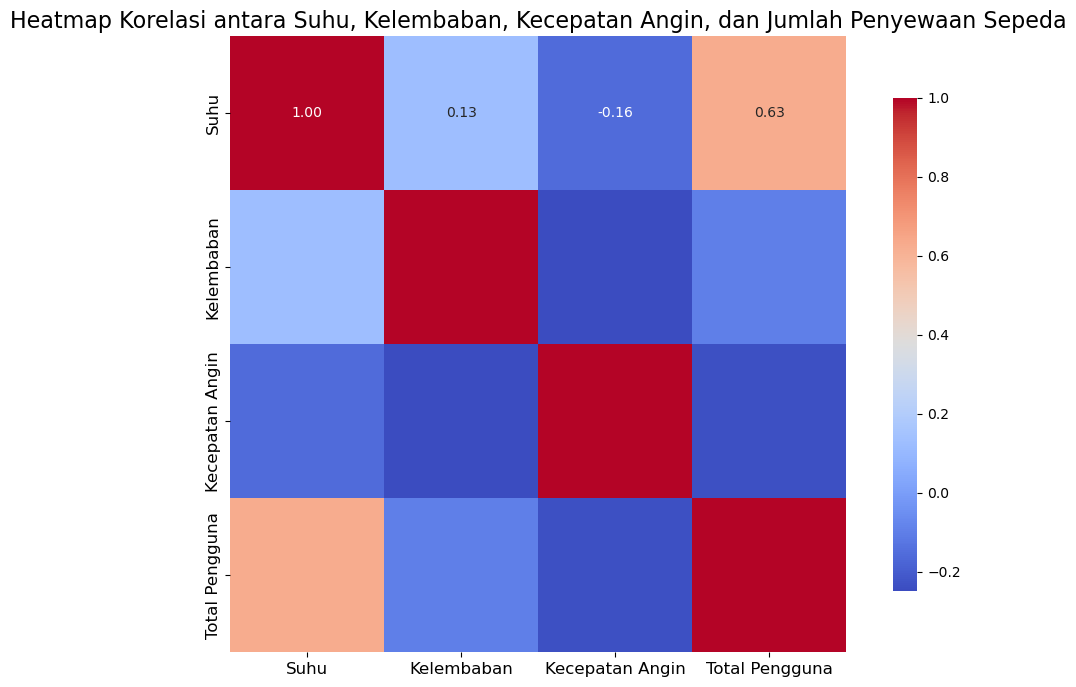

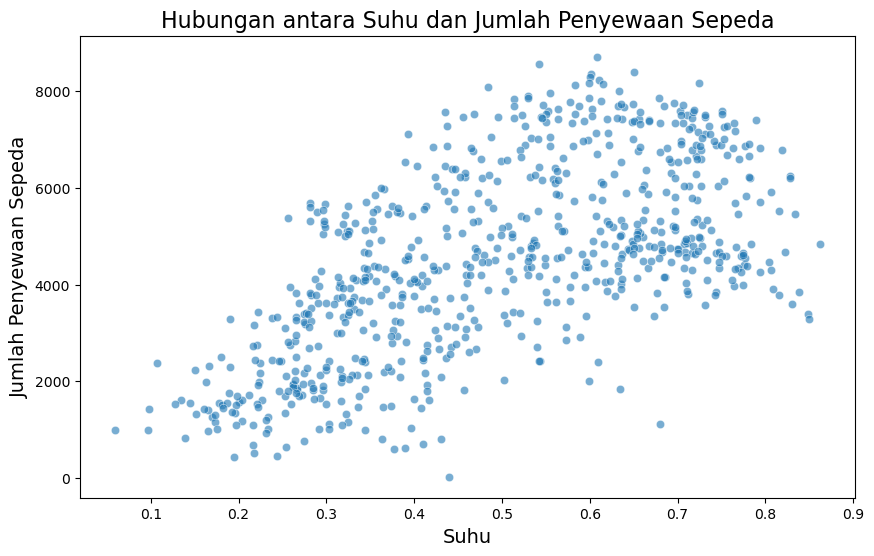

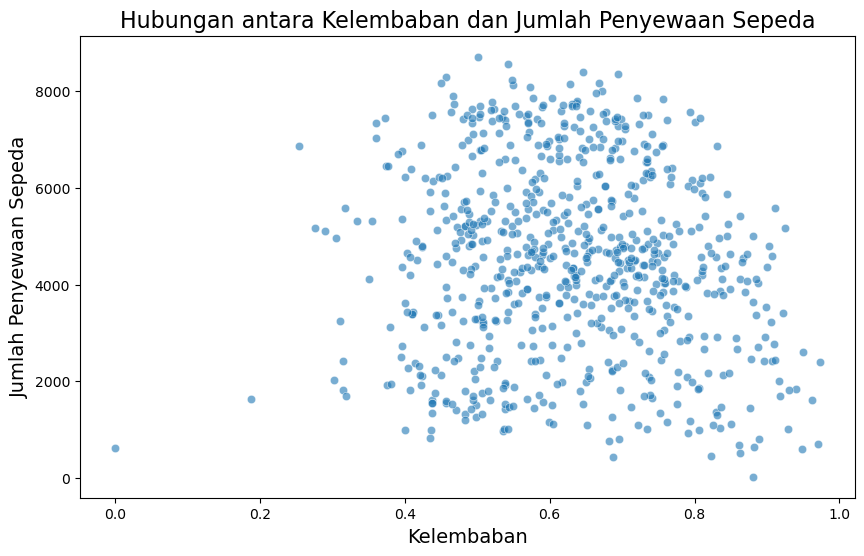

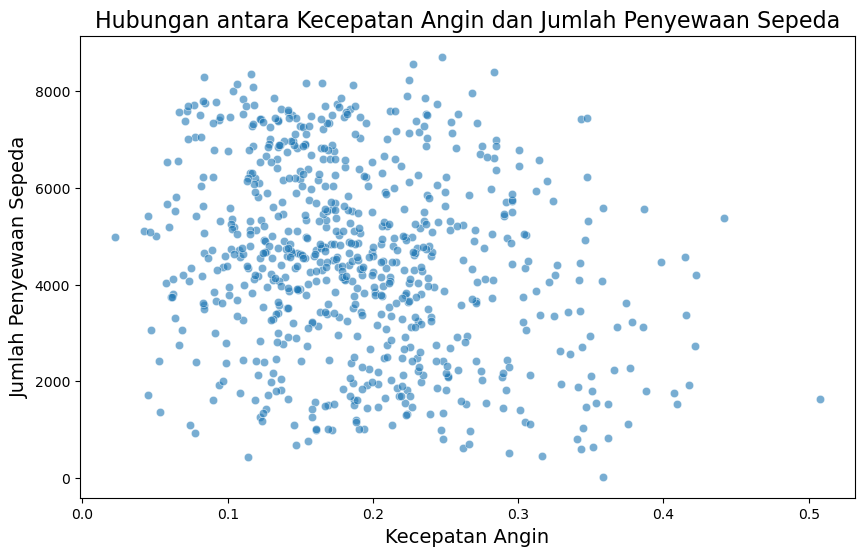

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil data suhu, kelembaban, kecepatan angin, dan jumlah sepeda yang disewa untuk analisis korelasi
data_for_correlation = day_df[['temp', 'humidity', 'windspeed', 'total_users']]

# Menghitung korelasi antara suhu, kelembaban, kecepatan angin, dan jumlah sepeda yang disewa
correlation_data = data_for_correlation.corr()

# Membuat heatmap untuk menunjukkan korelasi dengan ukuran yang diperbesar
plt.figure(figsize=(12, 8))  # Ukuran diperbesar
heatmap = sns.heatmap(correlation_data, 
                       annot=True,          # Menampilkan nilai korelasi di setiap sel
                       cmap='coolwarm',     # Warna peta untuk menunjukkan tingkat korelasi
                       fmt='.2f',           # Format angka dengan dua desimal
                       square=True,         # Memastikan setiap sel berbentuk persegi
                       cbar_kws={"shrink": .8}) # Mengatur ukuran color bar

# Mengatur label pada heatmap
heatmap.set_xticklabels(['Suhu', 'Kelembaban', 'Kecepatan Angin', 'Total Pengguna'], fontsize=12)
heatmap.set_yticklabels(['Suhu', 'Kelembaban', 'Kecepatan Angin', 'Total Pengguna'], fontsize=12)

plt.title('Heatmap Korelasi antara Suhu, Kelembaban, Kecepatan Angin, dan Jumlah Penyewaan Sepeda', fontsize=16)
plt.show()

# Scatter plot untuk menunjukkan hubungan antara suhu dan jumlah sepeda yang disewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='total_users', data=day_df, alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Suhu', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.show()

# Scatter plot untuk menunjukkan hubungan antara kelembaban dan jumlah sepeda yang disewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='total_users', data=day_df, alpha=0.6)
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Kelembaban', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.show()

# Scatter plot untuk menunjukkan hubungan antara kecepatan angin dan jumlah sepeda yang disewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='total_users', data=day_df, alpha=0.6)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Kecepatan Angin', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.show()




1. **Heatmap Korelasi**: Terdapat korelasi positif antara suhu dan jumlah pengguna sepeda, serta kelembaban dan jumlah pengguna sepeda. Kecepatan angin menunjukkan korelasi negatif dengan jumlah pengguna sepeda, menunjukkan bahwa semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung menurun.

2. **Scatter Plots**: 
   - **Suhu vs. Jumlah Penyewaan Sepeda**: Terdapat tren yang menunjukkan bahwa dengan meningkatnya suhu, jumlah penyewaan sepeda juga meningkat.
   - **Kelembaban vs. Jumlah Penyewaan Sepeda**: Terdapat variasi, tetapi secara umum, semakin tinggi kelembaban, jumlah penyewaan sepeda dapat menurun.
   - **Kecepatan Angin vs. Jumlah Penyewaan Sepeda**: Secara keseluruhan, semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung berkurang.



### Pertanyaan 3: Bagaimana pola penggunaan sepeda selama hari kerja dibandingkan dengan hari libur berdasarkan waktu ?

c:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


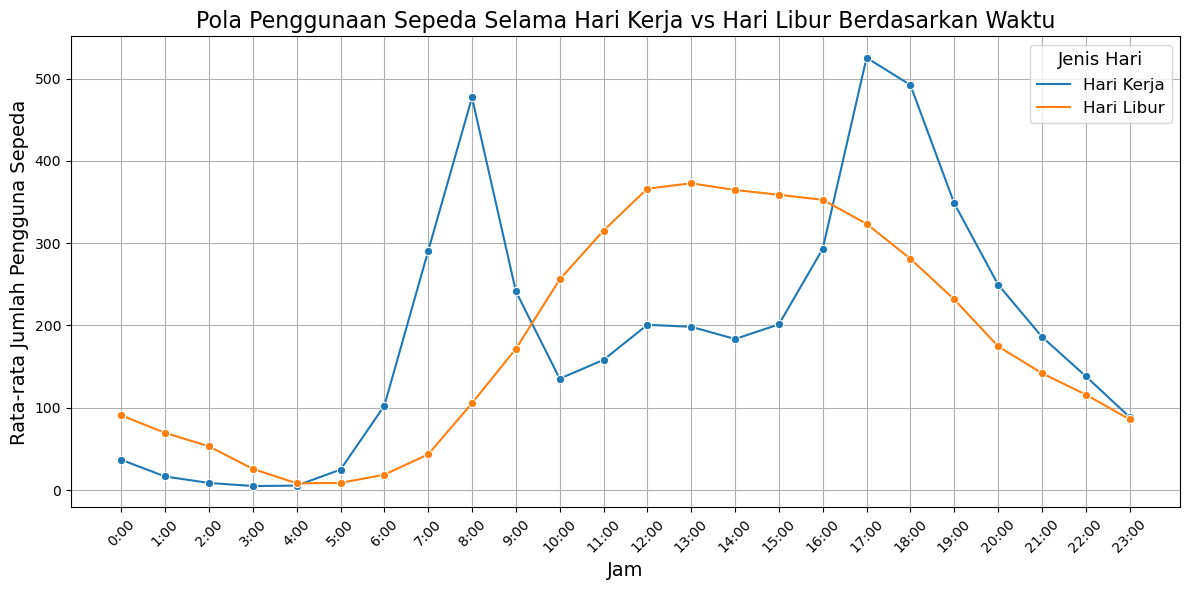

In [56]:
# Pastikan 'date' ada di kedua dataframe untuk merging
# Menggabungkan informasi workingday dari day_df ke hour_df berdasarkan 'date'
# Rename 'workingday' in day_df to avoid duplicate column name
day_df_renamed = day_df.rename(columns={'workingday': 'day_workingday'})

# Merging the renamed column with hour_df
hour_df = hour_df.merge(day_df_renamed[['date', 'day_workingday']], on='date', how='left')

# Membuat kolom baru di hour_df untuk menandakan apakah hari itu hari kerja atau hari libur
# Ganti 'workingday' dengan 'day_workingday'
hour_df['day_type'] = hour_df['day_workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur')

# Mengelompokkan data berdasarkan jam dan jenis hari (hari kerja/hari libur)
hourly_usage = hour_df.groupby(['hr', 'day_type']).agg({
    'total_users': 'mean'  # Mengambil rata-rata jumlah pengguna sepeda per jam
}).reset_index()

# Membuat line plot untuk menunjukkan pola penggunaan sepeda berdasarkan waktu dan hari
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='total_users', hue='day_type', data=hourly_usage, marker='o')

# Mengatur label dan judul
plt.title('Pola Penggunaan Sepeda Selama Hari Kerja vs Hari Libur Berdasarkan Waktu', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=14)

# Mengatur ticks pada sumbu x agar menampilkan jam dengan jelas
plt.xticks(ticks=range(0, 24), labels=[f'{hour}:00' for hour in range(0, 24)], rotation=45)

plt.legend(title='Jenis Hari', title_fontsize='13', fontsize='12')
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()


Visualisasi di atas menunjukkan **pola penggunaan sepeda** berdasarkan waktu, yang dibagi antara **hari kerja** dan **hari libur**. Pada **hari kerja**, penggunaan sepeda memuncak dua kali, yakni:
- **Pagi** sekitar pukul **8:00**.
- **Sore** sekitar pukul **17:00**.

Hal ini mencerminkan perjalanan rutin untuk bekerja. Sedangkan pada **hari libur**, penggunaan lebih stabil dan tinggi di sore hari tanpa puncak pagi yang signifikan, menunjukkan pola rekreasi atau aktivitas santai.

## Conclusion

**Pertanyaan:**
- Bagaimana pengaruh cuaca (weathersit) terhadap jumlah total pengguna sepeda (cnt) pada berbagai musim (season) di kedua dataset?
- Apakah terdapat korelasi antara suhu, kelembaban, dan kecepatan angin dengan jumlah sepeda yang disewa (baik pengguna kasual maupun terdaftar)?
- Bagaimana pola penggunaan sepeda selama hari kerja dibandingkan dengan hari libur berdasarkan waktu?


**Kesimpulan**:

- **Conclusion Pertanyaan 1**:
**Pengaruh cuaca terhadap jumlah total pengguna sepeda**:

   Cuaca berpengaruh signifikan terhadap jumlah total pengguna sepeda di berbagai musim. Pada musim panas dan musim semi, penggunaan sepeda lebih tinggi, terutama saat cuaca cerah. Sebaliknya, saat cuaca buruk seperti hujan atau berkabut, penggunaan sepeda menurun, terutama di musim dingin.

- **Conclusion Pertanyaan 2**:
**Korelasi antara suhu, kelembaban, dan kecepatan angin dengan jumlah sepeda yang disewa**:
   Terdapat korelasi positif antara **suhu** dengan jumlah pengguna sepeda—pengguna lebih banyak saat suhu lebih hangat. Namun, korelasi antara **kelembaban** dan **kecepatan angin** dengan jumlah pengguna sepeda cenderung negatif, menunjukkan bahwa kondisi ini dapat mengurangi jumlah penyewa sepeda.

- **Conclusion Pertanyaan 3**:
**Pola penggunaan sepeda selama hari kerja vs hari libur**:
   Penggunaan sepeda pada hari kerja memperlihatkan dua puncak aktivitas, di pagi hari (sekitar pukul 8:00) dan sore hari (sekitar pukul 17:00), yang menandakan perjalanan untuk bekerja. Sementara itu, pada hari libur, pola penggunaan sepeda lebih stabil, dengan puncak aktivitas di sore hari tanpa pola yang tajam di pagi hari, mencerminkan penggunaan untuk rekreasi.
